# **Diabetes Prediction through Logistic Regression Model**

Group 3 

Names: Sadia Khan Durani, Eric Yee, Jaden Lai, Danial Ramzan

## **1. Introduction**


Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose, which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. There are two types of diabetes; Type I diabetes, in which the pancreas produces little or no insulin by itself, and Type II diabetes which develops usually in adults and occurs when the body becomes resistant to insulin or doesn't make enough insulin by itself. In the past 30 years the prevalence of Type II diabetes has risen dramatically in countries of all income levels. About 422 million people worldwide have either Type I or Type II diabetes. For our study, we will be working with the Pima Indians Diabetes dataset. [1]

Source: WHO
https://www.who.int/health-topics/diabetes)


The Pima Indians dataset is valuable for studying the onset of diabetes in a population with a high genetic predisposition to the disease, resulting in high disease incidence rates. This dataset, which includes extensive data from the Pima Indians in Arizona, allows researchers to narrow down the causes and predictors of diabetes. The richness of this dataset stems from the extensive participation of the Pima Indians, providing invaluable data for various analyses. Moreover, it also enables comparisons with other groups, such as the Pima Indians in Mexico, to highlight the impact of different environmental and lifestyle factors on diabetes prevalence, offering comprehensive insights for broader public health research and interventions. In this study, we aim to use logistic regression. [2][3]

Source(s): 
https://repository.arizona.edu/bitstream/handle/10150/608737/Stowe_Senior_Capstone_Spring_16.pdf
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/

The `diabetes` dataset we are using was obtained from the National Institute of Diabetes and Digestive and Kidney Diseases located in the United States. The metrics contained in the dataset was taken from female patients of minimum 21 years of age and of Pima Indian Heritage. This dataset is useful to learn which factors can predict the presence of Diabetes, particularly for the female population, using different statistical methods. 

The original paper referenced by the dataset uses the ADAP learning algorithm to forecast the onset of diabetes mellitus. You can read more about this study [here.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf)
However, we are using logistic regression to see if we can achieve better predictive performance.

## 1.1. Data Description

In [1]:
# Necessary Import Statements
library(tidyverse)
library(repr)
library(GGally)
library(caret)
library(rsample)
library(MASS)
library(broom)

# Set seed
set.seed(123)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [2]:
# Loading the dataset into R
diabetes <- read.csv("https://raw.githubusercontent.com/sadia-kd/STAT-301-Project/main/data/diabetes-2.csv")
head(diabetes)

# Main developer: Sadia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


_Table 1.1: First 6 rows of the Diabetes data set._

In [3]:
# Number of columns
num_cols <- ncol(diabetes)
cat("This dataset has", num_cols ,"variables.")

# Main developer: Sadia

This dataset has 9 variables.

In [4]:
# Number of rows
n <- nrow(diabetes)
cat("This dataset has", n ,"observations.")

# Main developer: Sadia

This dataset has 768 observations.

<br>

| Variable | Description |
|----------|-------------|
| `Pregnancies` | Number of times pregnant |
| `Glucose` | Glucose Level (mg/dL) |
| `BloodPressure` | Blood Pressure Measurement (mm Hg) |
| `SkinThickness` | Thickness of the Skin (mm)|
| `Insulin` | Insulin Level in Blood ($\mu$U/ml) |
| `BMI` | Body Mass Index (Weight in kg / (Height in m$)^2$)|
| `DiabetesPedigreeFunction` | Diabetes Pedigree Function |
| `Age` | Age (years) |
| **Response**: `Outcome` | 1 indicates diabetic and 0 indicates non-diabetic |

_Table 1.2: Description of Each Variable_

## 1.2. Questions for Investigation

Our random variable of interest, the response, will be the 'Outcome' variable. This variable looks at whether the female patient has diabetes or not. Therefore, the questions that we will investigate using the Diabetes Dataset are:

- (1) Which variables are associated with the probability of a female patient being diabetic or not?
- (2) How accurately can we predict whether a female patient has diabetes or not based on the significant variables found?

The Diabetes dataset will assist in answering the questions above as the data is observational. The first question is focused on inference, as we look into identifying the associated explanatory variables with the response variable. Through statistical inferences with the data, we will look into identifying the variables that have a significant association with 'Outcome'. The second question is focused on prediction as we plan to utilize the model created to predict unseen observations.

<br>

## **2. Methods and Results**

## 2.1 Exploratory Data Analysis (EDA)

In [5]:
# The dataset has been loaded into R above

# Re-Display the top 3 rows of the dataset
head(diabetes, 3)

# Main developer: Jaden

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1


_Table 2.1: First 3 rows of the Diabetes data set._

`Outcome` is the response variable in our model, which is either 1 or 0. Thus, we will convert it from type `integer` to type `factor`.

In [6]:
# Converting Outcome to type factor
diabetes$Outcome <- as.factor(diabetes$Outcome)

# Double Check type of Outcome
is.factor(diabetes$Outcome)

# Main developer: Jaden and Sadia

[1] TRUE

In [7]:
# Check for missing data in any of the columns
colSums(is.na(diabetes))

# Main developer: Sadia

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

The Diabetes Dataset does not have any missing values (NA). However, we notice that `SkinThickness` and `Insulin` are 0 for patients 1, 2, and 3. This is not plausible, so we see that missing values were replaced with 0 in this dataset. We know that 0 is not plausible for the measurements/variables `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` for any patient. Thus, we remove these values and assign the cleaned data to `diabetes_clean`.

In [8]:
# Remove the 0 values using filter
diabetes_clean <- diabetes %>%
  filter(Glucose != 0,
         BloodPressure != 0,
         SkinThickness != 0,
         Insulin != 0,
         BMI != 0)

head(diabetes_clean, 3)

# Main developer: Jaden

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
1,1,89,66,23,94,28.1,0.167,21,0
2,0,137,40,35,168,43.1,2.288,33,1
3,3,78,50,32,88,31.0,0.248,26,1


_Table 2.2: First 6 rows of the cleaned Diabetes data set._

In [9]:
# Check number of rows remaining
n_new <- nrow(diabetes_clean)
cat("The cleaned data has", n_new ,"observations.")

# Main developer: Sadia

The cleaned data has 392 observations.

In [10]:
# Find the number of observations in each Outcome category
count_in_outcome <- diabetes_clean %>%
    group_by(Outcome) %>%
    summarise(count = n())

count_in_outcome

# Main developer: Sadia

Outcome,count
<fct>,<int>
0,262
1,130


_Table 2.3: We have 262 female patients that are non-diabetic and 130 patients that are diabetic. This could be problematic as we do not have a balanced dataset._

#### Data Visualization

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


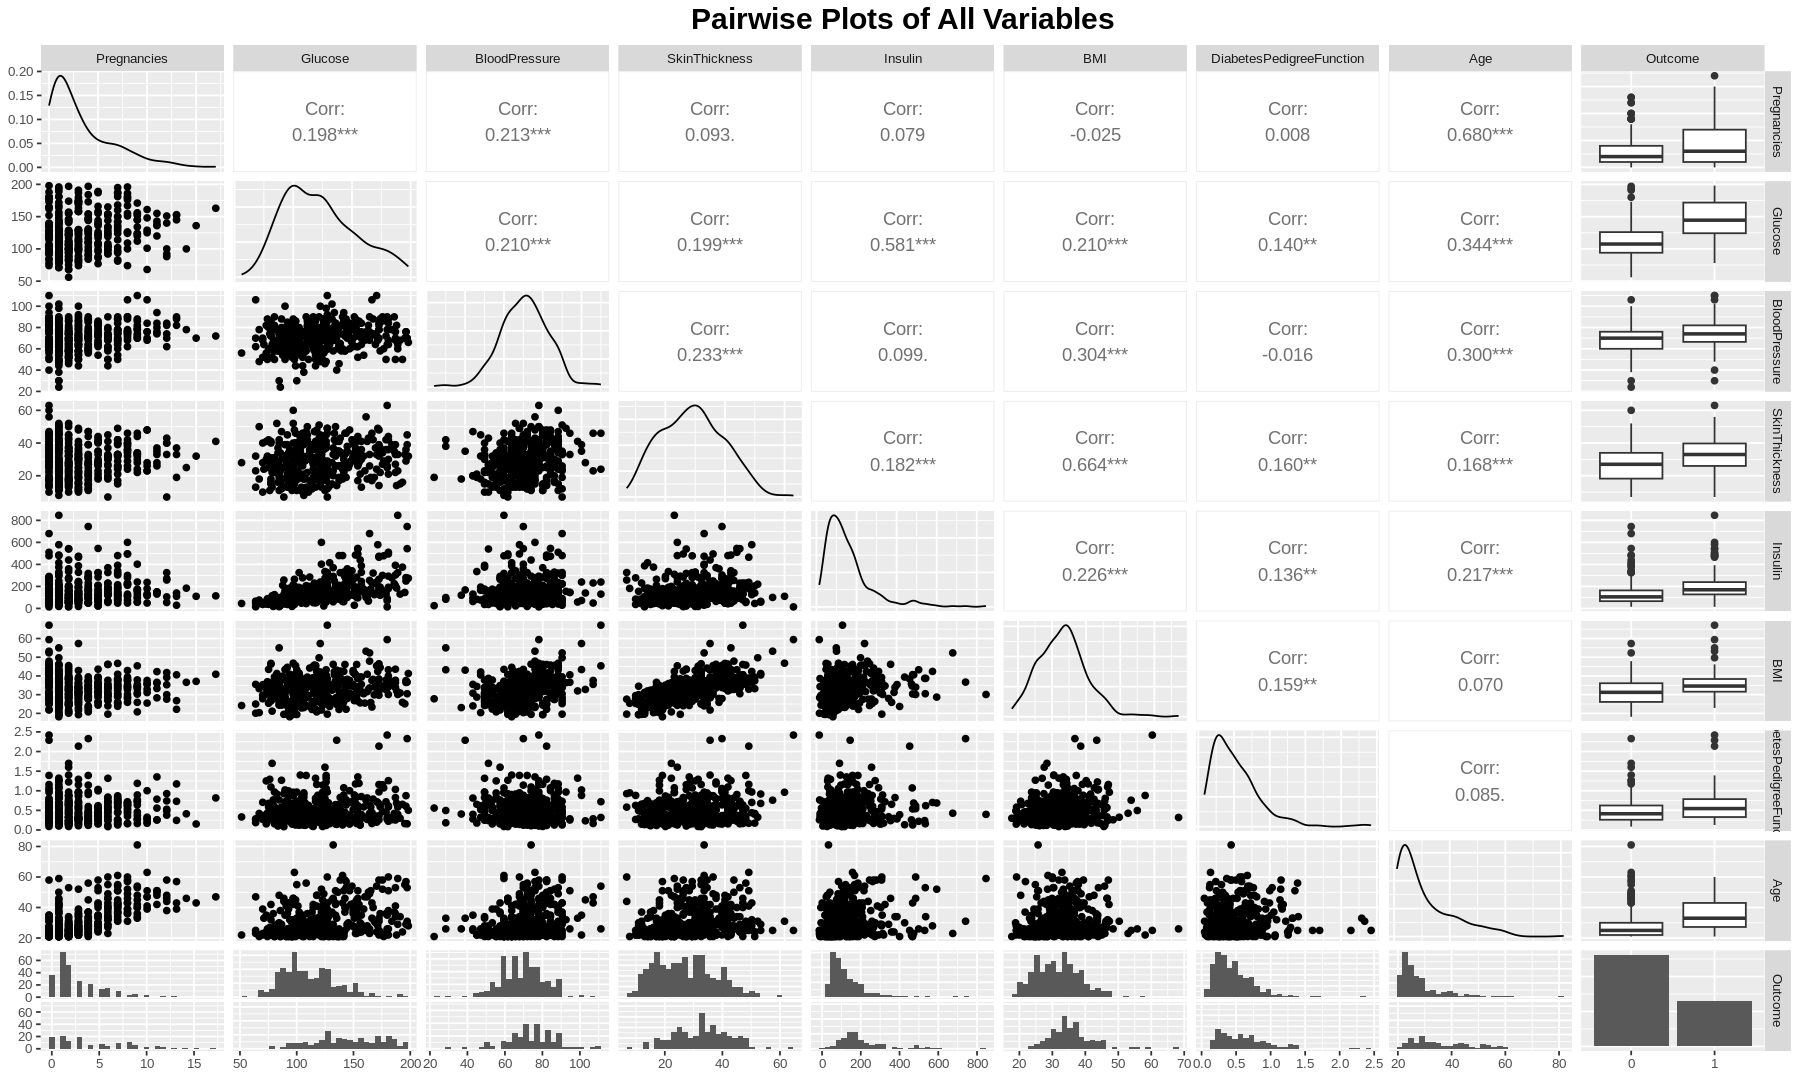

In [11]:
# Control the plot dimensions
options(repr.plot.width = 15, repr.plot.height = 9) 

# Create a GGPairs Plot
diabetes_pair_plots <- 
    diabetes_clean %>%
    ggpairs(progress = FALSE) +
    ggtitle("Pairwise Plots of All Variables") +
    theme(
        plot.title = element_text(face = "bold", hjust = 0.5, size = 18),
        text = element_text(size = 10),
        axis.title = element_text(face = "bold")
    ) 

diabetes_pair_plots

# Main developer: Jaden
# Contributor: Sadia

_Figure 2.1: GGPairs Plot_

A GGPairs Plot is useful here as the variables (excluding the response) are all numerical. This can make it easier to explore the data for our analysis. The highest correlation is 0.680 between `Age` and `Pregnancies`, and `BMI` and `SkinThickness`.

By observing the `Outcome` column , we see that the median for every explanatory variable in a patient *with* diabetes is higher. For `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, and `Age`, we see a noticable increase in interquartile range for patients *with* diabetes compared to those without diabetes. Specifically, the interquartile range for `Glucose`, `Insulin`, `BMI`, and `Age` of patients with diabetes is higher than their corresponding median value of patients without diabetes. This plot suggests that `Glucose`, `Insulin`, `BMI`, and `Age` in our most accurate models could be more plausible, whereas variables with higher correlation may not.

<br>

## 2.2 Methods: Plan

First, we'll split the data into training and testing sets so that we can evaluate our final model in the end as our project's aim is both inference and prediction. 

In [12]:
set.seed(123)

# Split data into training and testing sets with a 70/30 split
split <- initial_split(diabetes_clean, prop = 0.7)
diabetes_train <- training(split)
diabetes_test <- testing(split)

# Main developer: Eric 

### Model Selection

We plan to use the `StepAIC` function from the `MASS` package in order to find the best parameters for models of different sizes using forward selection. This function uses AIC (Akaike Information Criterion) to select the best models. In particular, the best model selected would have smaller AIC values. Thus, this function stops stepping once the AIC starts to increase instead of decrease when the model grows larger in size, so we won't be looking at all possible model sizes. To use `StepAIC`, we need to create two models, one with all and one with no parameters, in order to set the bounds of the models we want to step through. 

In [13]:
# Create full model with all 8 predictors
full_diabetes_logistic = glm(Outcome ~ ., family = "binomial", data = diabetes_train)

# Create null model
null_diabetes_logistic = glm(Outcome ~ 1, family = "binomial", data = diabetes_train)

# Forward selection using stepAIC() from MASS package
step_model <- stepAIC(null_diabetes_logistic, scope = list(
    lower = null_diabetes_logistic, upper = full_diabetes_logistic), direction = "forward")

step_model

# Main developer: Jaden

Start:  AIC=355.67
Outcome ~ 1

                           Df Deviance    AIC
+ Glucose                   1   262.54 266.54
+ Insulin                   1   322.61 326.61
+ Age                       1   323.34 327.34
+ BMI                       1   327.43 331.43
+ SkinThickness             1   335.00 339.00
+ DiabetesPedigreeFunction  1   341.68 345.68
+ BloodPressure             1   343.56 347.56
+ Pregnancies               1   343.74 347.74
<none>                          353.67 355.67

Step:  AIC=266.54
Outcome ~ Glucose

                           Df Deviance    AIC
+ BMI                       1   250.22 256.22
+ DiabetesPedigreeFunction  1   254.55 260.55
+ SkinThickness             1   254.83 260.83
+ Age                       1   256.55 262.55
<none>                          262.54 266.54
+ BloodPressure             1   260.90 266.90
+ Pregnancies               1   261.16 267.16
+ Insulin                   1   262.32 268.32

Step:  AIC=256.22
Outcome ~ Glucose + BMI

            


Call:  glm(formula = Outcome ~ Glucose + BMI + Age + DiabetesPedigreeFunction, 
    family = "binomial", data = diabetes_train)

Coefficients:
             (Intercept)                   Glucose                       BMI  
               -10.60175                   0.04228                   0.07893  
                     Age  DiabetesPedigreeFunction  
                 0.04020                   1.14273  

Degrees of Freedom: 273 Total (i.e. Null);  269 Residual
Null Deviance:	    353.7 
Residual Deviance: 238.2 	AIC: 248.2

_Figure 2.2: Output of Forward Selection using stepAIC()_

Now that we know which parameters are best in each model of different sizes (up to size 5), we can perform cross validation on each one to measure their accuracies. Cross validation is less prone to variance from the training/testing data split.

In [14]:
# Set number of folds for cross validation
cv_control <- trainControl(method = "cv", number = 5)

# Main developer: Eric

In [15]:
set.seed(123)

# Model of size 1 with lowest AIC from forward selection
model_1_cv <- train(
    as.formula(Outcome ~ Glucose),
    data = diabetes_train,
    method = "glm",
    family = "binomial",
    trControl = cv_control
)

# Compute model's accuracy
model_1_cv_accuracy <- model_1_cv$results %>%
    pull(Accuracy)
model_1_cv_accuracy

# Main developer: Eric (Cross Validation)
# Contributor: Jaden (Accuracy)

[1] 0.7556902

In [16]:
set.seed(123)

# Model of size 2 with lowest AIC from forward selection
model_2_cv <- train(
    as.formula(Outcome ~ Glucose + Age),
    data = diabetes_train,
    method = "glm",
    family = "binomial",
    trControl = cv_control
)

# Compute model's accuracy
model_2_cv_accuracy <- model_2_cv$results %>%
    pull(Accuracy)
model_2_cv_accuracy

# Main developer: Eric (Cross Validation)
# Contributor: Jaden (Accuracy)

[1] 0.7739394

In [17]:
set.seed(123)

# Model of size 3 with lowest AIC from forward selection
model_3_cv <- train(
    as.formula(Outcome ~ Glucose + Age + BMI),
    data = diabetes_train,
    method = "glm",
    family = "binomial",
    trControl = cv_control
)

# Compute model's accuracy
model_3_cv_accuracy <- model_3_cv$results %>%
    pull(Accuracy)
model_3_cv_accuracy

# Main developer: Eric (Cross Validation)
# Contributor: Jaden (Accuracy)

[1] 0.7957576

In [18]:
set.seed(123)

# Model of size 4 with lowest AIC from forward selection
model_4_cv <- train(
    as.formula(Outcome ~ Glucose + Age + BMI + DiabetesPedigreeFunction),
    data = diabetes_train,
    method = "glm",
    family = "binomial",
    trControl = cv_control
)

# Compute model's accuracy
model_4_cv_accuracy <- model_4_cv$results %>%
    pull(Accuracy)
model_4_cv_accuracy

# Main developer: Eric (Cross Validation)
# Contributor: Jaden (Accuracy)

[1] 0.7921212

In [19]:
set.seed(123)

# Model of size 5 with lowest AIC from forward selection

model_5_cv <- train(
    as.formula(Outcome ~ Glucose + Age + BMI + DiabetesPedigreeFunction + Pregnancies),
    data = diabetes_train,
    method = "glm",
    family = "binomial",
    trControl = cv_control
)

# Compute model's accuracy
model_5_cv_accuracy <- model_5_cv$results %>%
    pull(Accuracy)
model_5_cv_accuracy

# Main developer: Eric (Cross Validation)
# Contributor: Jaden (Accuracy)

[1] 0.7921212

The model with 3 parameters had the highest accuracy, despite it having a higher AIC seen in the forward selection process. However, the accuracies of each model are fairly close, and because AIC is a better metric to compare models of different sizes since it takes size into consideration, we'll still use the model of size 5 for our final model.

### Estimation + Inference

In [20]:
# Fit the selected variables on the entire training set
final_model <- glm(Outcome ~ Glucose + Age + BMI + DiabetesPedigreeFunction + Pregnancies, 
                    family = "binomial", 
                    data = diabetes_train)

summary(final_model)

# Main developer: Sadia


Call:
glm(formula = Outcome ~ Glucose + Age + BMI + DiabetesPedigreeFunction + 
    Pregnancies, family = "binomial", data = diabetes_train)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -10.645332   1.346565  -7.906 2.67e-15 ***
Glucose                    0.042306   0.006682   6.331 2.44e-10 ***
Age                        0.043957   0.022149   1.985  0.04719 *  
BMI                        0.078405   0.025198   3.111  0.00186 ** 
DiabetesPedigreeFunction   1.137561   0.519905   2.188  0.02867 *  
Pregnancies               -0.017055   0.068118  -0.250  0.80230    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 353.67  on 273  degrees of freedom
Residual deviance: 238.16  on 268  degrees of freedom
AIC: 250.16

Number of Fisher Scoring iterations: 5


_Figure 2.3: Summary Output of Final Model_

In [21]:
# Use tidy to get results
final_model_results <- final_model %>%
    tidy(conf.int = TRUE) %>%
    mutate(exp.estimate = exp(estimate)) %>%
    mutate(exp.conf.low = exp(conf.low)) %>%
    mutate(exp.conf.high = exp(conf.high)) %>%
    mutate_if(is.numeric, round, 3)
    

final_model_results
# Main developer: Sadia (Tidy Tibble)
# Contributor: Danial (Readability)

term,estimate,std.error,statistic,p.value,conf.low,conf.high,exp.estimate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-10.64533239,1.346565487,-7.9055438,2.667665e-15,-13.461376815,-8.16387518,2.381173e-05
Glucose,0.04230571,0.006682291,6.3310192,2.435471e-10,0.029869986,0.05618312,1.043213e+00
Age,0.04395717,0.022149238,1.9845904,4.719006e-02,0.001547663,0.08899778,1.044938e+00
BMI,0.07840471,0.025198369,3.1114993,1.861399e-03,0.030683300,0.12994890,1.081560e+00
DiabetesPedigreeFunction,1.13756098,0.519905167,2.1880163,2.866842e-02,0.152242461,2.18775013,3.119151e+00
Pregnancies,-0.01705520,0.068117904,-0.2503776,8.022953e-01,-0.151006252,0.11679607,9.830894e-01


_Table 2.4: Logistic Regression Results_

* At a 5% significance level, we see that 4 of the 5 variables: Glucose + Age + BMI and DiabetesPedigreeFunction are statistically associated with the probability of a female patient having diabetes.
* However, at a 5% significance level, there is not enough evidence to reject the null hypothesis that the number of pregnancies is not associated with the probability of a female patient having diabetes.

### Prediction

In [22]:
set.seed(123)

# Use model_size_3 to predict Outcome results on testing set
predicted_outcome_test <- if_else(predict(final_model, newdata = diabetes_test, type = "response") > 0.5, "1", "0")

# Obtain testing set outcomes
actual_outcome_test <- diabetes_test$Outcome

# Compute accuracy of predicted results
accuracy <- mean(predicted_outcome_test == actual_outcome_test)
accuracy

# Main developer: Jaden

[1] 0.8135593

We tested it against our testing data to get a final accuracy score of 81.4%.

As mentioned above, we have a class imbalance in our cleaned data set. There are 262 female patients that are non-diabetic and 130 patients that are diabetic. Therefore, we will consider other classification metrics given with the confusionMatrix() function.

In [23]:
# Create a confusion matrix
confusion_matrix <- confusionMatrix(as.factor(predicted_outcome_test), as.factor(actual_outcome_test),
                                    positive = "1")
confusion_matrix

# Main developer: Sadia

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 75 14
         1  8 21
                                          
               Accuracy : 0.8136          
                 95% CI : (0.7314, 0.8793)
    No Information Rate : 0.7034          
    P-Value [Acc > NIR] : 0.004491        
                                          
                  Kappa : 0.5299          
                                          
 Mcnemar's Test P-Value : 0.286422        
                                          
            Sensitivity : 0.6000          
            Specificity : 0.9036          
         Pos Pred Value : 0.7241          
         Neg Pred Value : 0.8427          
             Prevalence : 0.2966          
         Detection Rate : 0.1780          
   Detection Prevalence : 0.2458          
      Balanced Accuracy : 0.7518          
                                          
       'Positive' Class : 1               
                                    

_Figure 2.4: Confusion Matrix Results for the Model on the Test Set_

- The number of True Positives is 21
- The number of True Negatives is 75
- The number of False Positives is 8
- The number of False Negatives is 14

## **3. Discussion**

Re-Stating Questions:

(1) Which variables are associated with the probability of a female patient being diabetic or not?

(2) How accurately can we predict whether a female patient has diabetes or not based on the significant variables found?

To summarize, we began our analysis through some EDA, and data cleaning. Then we use an automated procedure, forward selection, with the function stepAIC() to find the best models of sizes 1 to 5. Then we ran cross-validation with each best selected model to find the best performing one. Finally, we re-fitted the model usuing the entire training set.


**Inference**

From our inferential analysis, we identified that Glucose, Age, BMI, and DiabetesPedigreeFunction are statistically associated with the probability of a female patient being diabetic.
* For every **one mg/dL increase in glucose levels**, the odds of a female patient having diabetes is expected to increase by about 4.3%%, while holding Age, BMI, and DiabetesPedigreeFunction fixed.
* For every **year increase in age**, the odds of a female patient having diabetes is expected to increase by about 4.5%, while holding Glucose, BMI, and DiabetesPedigreeFunction fixed.
* For every **one unit increase in BMI**, the odds of a female patient having diabetes is expected to increase by about 8.2%, while holding Glucose, Age, and DiabetesPedigreeFunction fixed.
* For every **one unit increase in DiabetesPedigreeFunction**, the odds of a female patient having diabetes is expected to increase by about 212%, while holding Glucose, Age, and BMI fixed.

**Prediction**

After running our final model on our testing set, we got an accuracy score of 81.4%. This metric is not the best in our case due to the class imbalance. So we use additional metrics to discuss our model found with the confusionMatrix() function.

Using the model on the testing set gives a sensitivity score of 0.6000 and a specificity score of 0.9036. Specifically, the model correctly identifies 60.00% of the female patients as diabetic and correctly identifies 90.36% of the female patients being non-diabetic. Thus, our final model selected with 5 predictors is better at predicting when a female patient is not diabetic given that the patient is in fact not diabetic.

**Implications/Impact**

Given the lower sensitivity score, this model should not be used in a real setting. Otherwise, we will not be able to identify patients that are diabetic which is critical to ensure that diabetic patients can be treated on time.

**Model Improvements**

A prime target for model improvements is addressing the almost 2:1 class imbalance in the training set. This can be acheived by duplicating data points with outcome = 1 until the amount of people with and without diabetes is roughly equal. Another way is by using interpolation techniques like SMOTE to oversample.

We can also try transforming the data by removing outliers and/or applying a log transformation on the predictors before fitting a model to the data.

Additionally, experimenting with alternative models, such as the KNN algorithm or decision trees, could provide better predictive performance and robustness.

**Future Questions/Research**

Future research could be more effective if another study was conducted by the NIDDK or a related organization which used a larger sample size and which doesn't have invalid values (we had to remove more than 50% of the dataset to remove implausable 0 values in the data. This doesent even account for the 0's in pregnancies that may have been invalid). This would help defeat the negative effects of outliers lead to a more accurate model.

Another question that may be posed is asking whether this model would have equal or similar predictive power on females of different demographic groups, rather than just Pima Indians. This would help us evaluate if diabetes manifests similarly in people of different ethnicities and races.



<br>

## **4. References**


Dataset: https://www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download

[1] https://www.who.int/health-topics/diabetes

[2] https://repository.arizona.edu/bitstream/handle/10150/608737/Stowe_Senior_Capstone_Spring_16.pdf

[3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/
 


<br>